In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('./Bank-Dataset/bank_marketing_updated_v1.csv', skiprows=[0,1])

In [4]:
df.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
df.dtypes

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [7]:
len(df[~df.age.isnull()])

45191

In [8]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [9]:
df.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [10]:
meanMonthVal = df.month.mode()[0]
meanMonthVal

'may, 2017'

In [11]:
df.month.fillna(meanMonthVal, inplace=True)

In [12]:
df.month.value_counts()

may, 2017    13797
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [13]:
df.pdays.value_counts(normalize=True)

-1      0.817367
 182    0.003694
 92     0.003251
 183    0.002787
 91     0.002787
          ...   
 749    0.000022
 717    0.000022
 589    0.000022
 493    0.000022
 32     0.000022
Name: pdays, Length: 559, dtype: float64

In [14]:
df.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [15]:
df = df[df.age.isnull() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45191 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45191 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45191 non-null  int64  
 3   balance     45191 non-null  int64  
 4   marital     45191 non-null  object 
 5   jobedu      45191 non-null  object 
 6   targeted    45191 non-null  object 
 7   default     45191 non-null  object 
 8   housing     45191 non-null  object 
 9   loan        45191 non-null  object 
 10  contact     45191 non-null  object 
 11  day         45191 non-null  int64  
 12  month       45191 non-null  object 
 13  duration    45191 non-null  object 
 14  campaign    45191 non-null  int64  
 15  pdays       45191 non-null  int64  
 16  previous    45191 non-null  int64  
 17  poutcome    45191 non-null  object 
 18  response    45161 non-null  object 
dtypes: float64(1), int64(7), 

In [16]:
import numpy as np

In [17]:
df.loc[df.pdays < 0, "pdays"] = np.nan

In [18]:
df.pdays.value_counts()

182.0    167
92.0     146
183.0    126
91.0     126
181.0    116
        ... 
432.0      1
25.0       1
445.0      1
579.0      1
526.0      1
Name: pdays, Length: 557, dtype: int64

In [19]:
df.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [20]:
df.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [21]:
df.response.isnull().sum()

30

In [22]:
df.shape

(45191, 19)

In [23]:
30 * 100/ 45191

0.06638489964816004

In [24]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no


In [25]:
df.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [26]:
df.age = df.age.astype('int')
df.age.mean()

40.93565090394105

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45191 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45191 non-null  int64  
 1   age         45191 non-null  int64  
 2   salary      45191 non-null  int64  
 3   balance     45191 non-null  int64  
 4   marital     45191 non-null  object 
 5   jobedu      45191 non-null  object 
 6   targeted    45191 non-null  object 
 7   default     45191 non-null  object 
 8   housing     45191 non-null  object 
 9   loan        45191 non-null  object 
 10  contact     45191 non-null  object 
 11  day         45191 non-null  int64  
 12  month       45191 non-null  object 
 13  duration    45191 non-null  object 
 14  campaign    45191 non-null  int64  
 15  pdays       8252 non-null   float64
 16  previous    45191 non-null  int64  
 17  poutcome    45191 non-null  object 
 18  response    45161 non-null  object 
dtypes: float64(1), int64(7), 

In [28]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no


In [29]:
df.age.value_counts()

32    2085
31    1994
33    1972
34    1929
35    1892
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

In [30]:
df.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

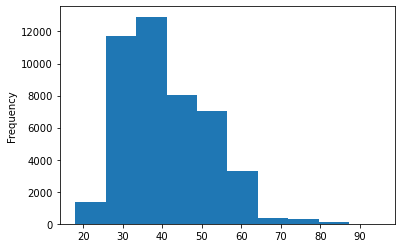

In [31]:
df.age.plot.hist()
plt.show()

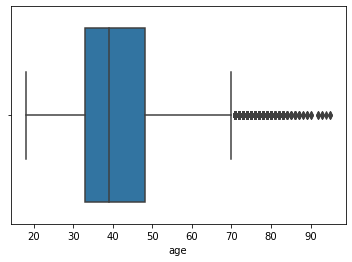

In [32]:
sns.boxplot(df.age)
plt.show()

In [33]:
df.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [34]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no


In [35]:
df.balance.value_counts()

 0       3514
 1        194
 2        156
 4        139
 3        134
         ... 
-854        1
 2891       1
 8953       1
 2859       1
 5674       1
Name: balance, Length: 7167, dtype: int64

In [36]:
df.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

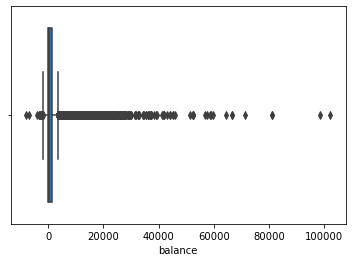

In [37]:
sns.boxplot(df.balance)
plt.show()

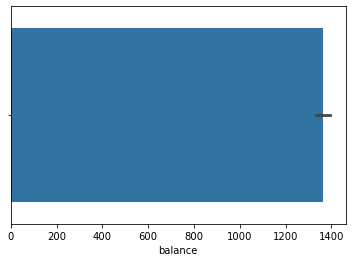

In [38]:
sns.barplot(df.balance, orient='h')
plt.show()

In [39]:
df.balance.quantile([0.5, 0.75, 0.90, 0.95, 0.99])

0.50      448.0
0.75     1428.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [40]:
df[df.balance > 15000].head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
334,335,45,100000,24598,divorced,"management,tertiary",no,no,yes,no,unknown,5,"may, 2017",313 sec,3,NaN,0,unknown,no
446,447,39,60000,45248,single,"technician,unknown",no,no,yes,no,unknown,6,"may, 2017",1623 sec,1,NaN,0,unknown,yes
920,921,44,50000,58544,married,"admin.,secondary",yes,no,yes,no,unknown,7,"may, 2017",144 sec,2,NaN,0,unknown,no
2065,2066,55,55000,18722,married,"retired,secondary",yes,no,yes,no,unknown,12,"may, 2017",128 sec,2,NaN,0,unknown,no
2343,2344,26,60000,24299,single,"technician,secondary",yes,no,yes,no,unknown,13,"may, 2017",704 sec,1,NaN,0,unknown,no


In [41]:
df.balance[df.balance>15000].describe()

count       351.000000
mean      24295.780627
std       12128.560693
min       15030.000000
25%       17074.000000
50%       20723.000000
75%       26254.000000
max      102127.000000
Name: balance, dtype: float64

In [42]:
df.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

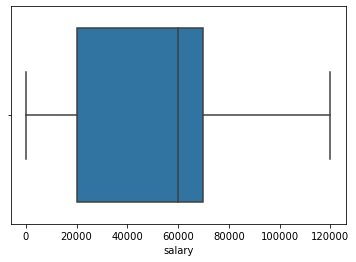

In [43]:
sns.boxplot(df.salary)

In [44]:
df.salary.quantile([0.5, 0.75, 0.90, 0.95, 0.99])

0.50     60000.0
0.75     70000.0
0.90    100000.0
0.95    100000.0
0.99    120000.0
Name: salary, dtype: float64

In [45]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no


In [46]:
df.duration.value_counts()

1.5 min                 138
2.06666666666667 min    129
1.68333333333333 min    129
2.03333333333333 min    127
1.73333333333333 min    127
                       ... 
16.2833333333333 min      1
1330 sec                  1
25.6666666666667 min      1
31.3333333333333 min      1
25.1333333333333 min      1
Name: duration, Length: 2646, dtype: int64

In [47]:
df['durationInMin'] = df.duration.apply(lambda x: x[:-4] if (x[:-3] == "min") else float(x[:-4])/60)

In [48]:
df.drop(['durationInSec'], axis=1)

KeyError: "['durationInSec'] not found in axis"

In [49]:
df.durationInMin.describe()

count    45191.000000
mean         1.387796
std          3.077392
min          0.000000
25%          0.037222
50%          0.083333
75%          1.516667
max         64.683333
Name: durationInMin, dtype: float64

In [77]:
df.contact.value_counts()

cellular     29273
unknown      13012
telephone     2906
Name: contact, dtype: int64

In [52]:
df['education'] = df.jobedu.apply(lambda x: x.split(',')[1])
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,durationInMin,education
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,NaN,0,unknown,no,4.350000,tertiary
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,NaN,0,unknown,no,2.516667,secondary
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,NaN,0,unknown,no,1.266667,secondary
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,NaN,0,unknown,no,1.533333,unknown
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,NaN,0,unknown,no,3.300000,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,...,17,"nov, 2017",16.2833333333333 min,3,NaN,0,unknown,yes,0.271389,tertiary
45207,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,...,17,"nov, 2017",7.6 min,2,NaN,0,unknown,yes,0.126667,primary
45208,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,...,17,"nov, 2017",18.7833333333333 min,5,184.0,3,success,yes,0.313056,secondary
45209,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,...,17,"nov, 2017",8.46666666666667 min,4,NaN,0,unknown,no,0.141111,secondary


In [57]:
df['job'] = df.jobedu.apply(lambda x: x.split(',')[0])
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,month,duration,campaign,pdays,previous,poutcome,response,durationInMin,education,job
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,"may, 2017",261 sec,1,NaN,0,unknown,no,4.350000,tertiary,management
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,"may, 2017",151 sec,1,NaN,0,unknown,no,2.516667,secondary,technician
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,"may, 2017",76 sec,1,NaN,0,unknown,no,1.266667,secondary,entrepreneur
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,"may, 2017",92 sec,1,NaN,0,unknown,no,1.533333,unknown,blue-collar
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,"may, 2017",198 sec,1,NaN,0,unknown,no,3.300000,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,...,"nov, 2017",16.2833333333333 min,3,NaN,0,unknown,yes,0.271389,tertiary,technician
45207,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,...,"nov, 2017",7.6 min,2,NaN,0,unknown,yes,0.126667,primary,retired
45208,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,...,"nov, 2017",18.7833333333333 min,5,184.0,3,success,yes,0.313056,secondary,retired
45209,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,...,"nov, 2017",8.46666666666667 min,4,NaN,0,unknown,no,0.141111,secondary,blue-collar


In [53]:
df.groupby('education')['salary'].mean()

education
primary      34224.510663
secondary    49736.127280
tertiary     82878.300113
unknown      46558.427571
Name: salary, dtype: float64

In [54]:
df.groupby('education')['salary'].median()

education
primary       20000
secondary     55000
tertiary     100000
unknown       50000
Name: salary, dtype: int64

In [58]:
df.groupby('job')['salary'].mean()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

In [59]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,month,duration,campaign,pdays,previous,poutcome,response,durationInMin,education,job
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,"may, 2017",261 sec,1,NaN,0,unknown,no,4.350000,tertiary,management
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,"may, 2017",151 sec,1,NaN,0,unknown,no,2.516667,secondary,technician
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,"may, 2017",76 sec,1,NaN,0,unknown,no,1.266667,secondary,entrepreneur
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,"may, 2017",92 sec,1,NaN,0,unknown,no,1.533333,unknown,blue-collar
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,"may, 2017",198 sec,1,NaN,0,unknown,no,3.300000,unknown,unknown


In [66]:
df['response_flag'] = np.where(df.response == 'yes', 1, 0)
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,durationInMin,education,job,response_flag
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,261 sec,1,NaN,0,unknown,no,4.350000,tertiary,management,0
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,151 sec,1,NaN,0,unknown,no,2.516667,secondary,technician,0
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,76 sec,1,NaN,0,unknown,no,1.266667,secondary,entrepreneur,0
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,92 sec,1,NaN,0,unknown,no,1.533333,unknown,blue-collar,0
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,198 sec,1,NaN,0,unknown,no,3.300000,unknown,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,...,16.2833333333333 min,3,NaN,0,unknown,yes,0.271389,tertiary,technician,1
45207,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,...,7.6 min,2,NaN,0,unknown,yes,0.126667,primary,retired,1
45208,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,...,18.7833333333333 min,5,184.0,3,success,yes,0.313056,secondary,retired,1
45209,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,...,8.46666666666667 min,4,NaN,0,unknown,no,0.141111,secondary,blue-collar,0


In [67]:
df.response_flag.mean()

0.11694806488017526

In [68]:
df.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [69]:
df.response_flag.value_counts(normalize=True)

0    0.883052
1    0.116948
Name: response_flag, dtype: float64

In [70]:
df.groupby('education')['response_flag'].mean()

education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64